In [194]:
#Import all library needed
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#confusion matrix visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [195]:
### 1. Link notebook with google drive and access data from your personal Gdrive
from google.colab import drive
drive.mount("/content/gdrive")

### 2.Set the data path for dataset and model location (ex: model_loc = "/content/gdrive/My Drive/Dataset/")
dataset_dir = "/content/gdrive/My Drive/UTM Y4S2/BIOINFORMATICS MODELING AND SIMULATION/"#insert the path here
model_loc = "/content/gdrive/My Drive/UTM Y4S2/BIOINFORMATICS MODELING AND SIMULATION/"#insert the path here

print(os.listdir(dataset_dir))
data = pd.read_csv(dataset_dir+'heart.csv')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['Week3_HeartDisease (1).ipynb', 'heart.csv', 'Week3_HeartDisease.ipynb']


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Missing values before handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


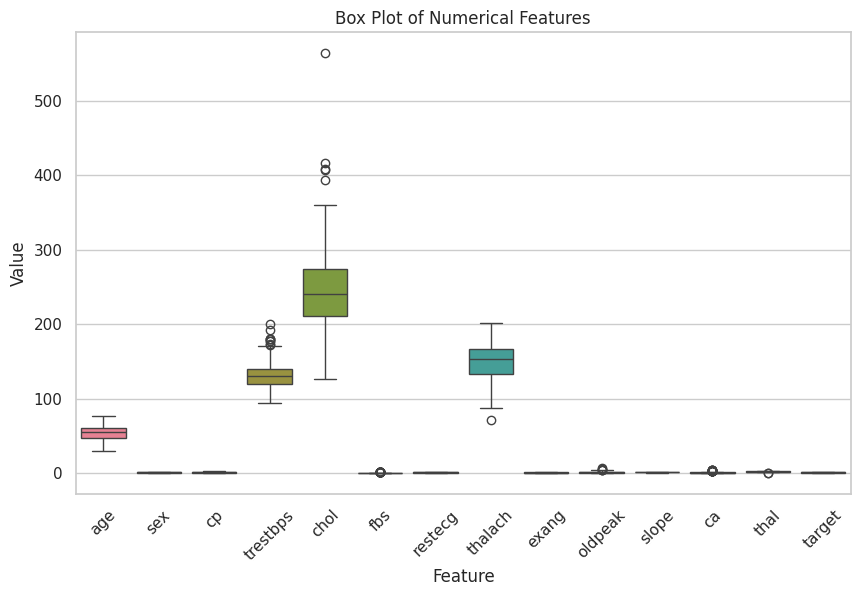

Indices of outliers: [0, 260, 8, 136, 266, 137, 267, 269, 14, 272, 278, 23, 281, 26, 282, 28, 29, 158, 291, 36, 292, 163, 164, 165, 169, 170, 297, 300, 176, 48, 52, 181, 60, 191, 64, 197, 203, 76, 204, 78, 208, 83, 85, 214, 87, 215, 217, 90, 219, 220, 93, 222, 223, 96, 97, 221, 99, 92, 101, 103, 231, 106, 234, 110, 111, 238, 241, 246, 247, 248, 249, 250, 251, 252, 255]


In [196]:
### 3. Insert Exploratory data analysis (EDA) steps to analyze and investigate datasets.

# Inspect data
print(data.head())

# Check for missing values
print("Missing values before handling:")
print(data.isnull().sum())

# Box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title("Box Plot of Numerical Features")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

# Identify outliers
outlier_indices = []
for column in data.select_dtypes(include=['int', 'float']):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)].index
    outlier_indices.extend(outliers)

outlier_indices = list(set(outlier_indices))  # Remove duplicate indices

print("Indices of outliers:", outlier_indices)





In [197]:
### 4. What is the purpose of the code that sets a list of categorical variables
### in a dataset and then casts those variables to the object data type using the astype() function?

catagorialList = ['sex','cp','fbs','restecg','exang','ca','thal']
for item in catagorialList:
    data[item] = data[item].astype('object') #casting to object

What is the purpose of the code that sets a list of categorical variables in a dataset and then casts those variables to the object data type using the astype() function?
- Explicit Declaration: The code explicitly marks certain columns as categorical variables within the dataset.
- Preparation for Encoding: It prepares the categorical variables for encoding into indicator variables using techniques like one-hot encoding.
- Memory Efficiency: Casting to object data type can sometimes save memory compared to other data types like integers or floats.
- Interpretability: Object data type signifies that the variable is categorical, aiding in better interpretation of the dataset's structure.
- Compatibility: It ensures that the variables are in a format suitable for various categorical encoding techniques.

In [198]:
 ### 5. Create more data by categorical variable into indicator variables using 'get_dummies' function

data = pd.get_dummies(data, columns=catagorialList)#complete your code here

print(data)

     age  trestbps  chol  thalach  oldpeak  slope  target  sex_0  sex_1  cp_0  \
0     63       145   233      150      2.3      0       1      0      1     0   
1     37       130   250      187      3.5      0       1      0      1     0   
2     41       130   204      172      1.4      2       1      1      0     0   
3     56       120   236      178      0.8      2       1      0      1     0   
4     57       120   354      163      0.6      2       1      1      0     1   
..   ...       ...   ...      ...      ...    ...     ...    ...    ...   ...   
298   57       140   241      123      0.2      1       0      1      0     1   
299   45       110   264      132      1.2      1       0      0      1     0   
300   68       144   193      141      3.4      1       0      0      1     1   
301   57       130   131      115      1.2      1       0      0      1     1   
302   57       130   236      174      0.0      1       0      1      0     0   

     ...  exang_1  ca_0  ca

<ipython-input-198-ac7afc6af15e>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, columns=catagorialList)#complete your code here
<ipython-input-198-ac7afc6af15e>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, columns=catagorialList)#complete your code here
<ipython-input-198-ac7afc6af15e>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, columns=catagorialList)#complete your code here
<ipython-input-198-ac7afc6af15e>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummie

In [199]:
### 6. Explain line 3,4 and 5 and print the shape of x and y

y = data['target'].values
y = y.reshape(y.shape[0],1)
x = data.drop(['target'],axis=1)
##

Explain line 3,4 and 5 and print the shape of x and y
- Line 3: This line extracts the values from the 'target' column of the DataFrame data and assigns it to the variable y. It essentially creates the target variable for your predictive model.
- Line 4: Here, reshape() is used to reshape the y array. The first argument y.shape[0] specifies the number of rows in the original y array, and the second argument 1 specifies that we want to reshape y into a single-column array. This is often necessary when preparing the target variable for use in machine learning models, especially when dealing with libraries like scikit-learn which expect a 2D array for the target variable.
- Line 5: This line creates the feature matrix x by dropping the 'target' column from the DataFrame data. It removes the target variable from the dataset so that the remaining columns can be used as features for training the predictive model.

In [200]:
### 7. Create a simple dataset and demonstrate the normalization code on the simple dataset

# Creating a simple dataset
simple_data = pd.DataFrame({
    'feature1': [10, 20, 30, 40, 50],
    'feature2': [100, 200, 300, 400, 500]
})

print("Original Dataset:")
print(simple_data)

# Min-Max normalization
minx = np.min(simple_data)
maxx = np.max(simple_data)
normalized_data = (simple_data - minx) / (maxx - minx)

print("\nNormalized Dataset:")
print(normalized_data)

Original Dataset:
   feature1  feature2
0        10       100
1        20       200
2        30       300
3        40       400
4        50       500

Normalized Dataset:
   feature1  feature2
0      0.00      0.00
1      0.25      0.25
2      0.50      0.50
3      0.75      0.75
4      1.00      1.00


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [201]:
### 8. Describe the heart dataset after implementing the min max normalization

#Normalize data (range 0 - 1)
minx = np.min(x)
maxx = np.max(x)
x = (x - minx) / (maxx - minx)
x.head()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,trestbps,chol,thalach,oldpeak,slope,sex_0,sex_1,cp_0,cp_1,...,exang_1,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Describe the heart dataset after implementing the min max normalization
- All feature values have been scaled to lie within the range of 0 to 1.

In [202]:
### 9. Modify the code to split the dataset into train and test (train 70%, val 20% and test 10%).

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# re-create train and validation set

x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size=0.25, random_state=42)
# train 70%, validation 20%, test 10%
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(181, 28)
(61, 28)
(61, 28)


In [203]:
### 10. What is the purpose of each layer in the neural network created using the Sequential() function with 64, 32, and 1 neurons,
### respectively, and softmax and sigmoid activation functions?

model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=28, activation='softmax')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                1856      
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dense_38 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3969 (15.50 KB)
Trainable params: 3969 (15.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


What is the purpose of each layer in the neural network created using the Sequential() function with 64, 32, and 1 neurons, respectively, and softmax and sigmoid activation functions?
- Input layer (Dense, 64 neurons, softmax activation):
  - The input layer receives the input data, which in this case has 28 features (input_dim=28).
  - The softmax activation function is applied to convert the raw output of the neurons into probabilities.
- Hidden Layer (Dense, 32 neurons, softmax activation)
  - The hidden layer processes the input data and extracts higher-level features.
  - Softmax activation is used again to ensure that the output of each neuron is a probability, which can facilitate the learning process.
- Output Layer (Dense, 1 neuron, sigmoid activation)
  - The output layer produces the final output of the neural network, which is a binary classification prediction (0 or 1).
  - Sigmoid activation function is used to squash the output into the range [0, 1], representing the probability of the input belonging to the positive class (class 1).

In [204]:
### 11. This code compiles a neural network model with a mean squared error loss function, the Adam optimizer with a learning rate of 0.01,
### and accuracy as a performance metric. What does each of these components mean, and how do they affect the model training and performance?

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

This code compiles a neural network model with a mean squared error loss function, the Adam optimizer with a learning rate of 0.01, and accuracy as a performance metric. What does each of these components mean, and how do they affect the model training and performance?
- The loss function = mse: The MSE penalizes large errors more heavily than small errors, making it suitable for regression tasks.
- Adam optimizer: Adam (Adaptive Moment Estimation) is an optimization algorithm that combines the advantages of both AdaGrad and RMSProp. It adapts the learning rate for each parameter individually, allowing for faster convergence and better performance.
  - Learning rate parameter: The step size used for updating the weights during optimization. A higher learning rate can lead to faster convergence, but it may also risk overshooting the optimal solution.
- Accuracy: Accuracy is a common performance metric used for classification tasks. It measures the proportion of correctly classified samples out of the total number of samples.

These components train the neural network model effectively and monitor its performance throughout the training process

In [205]:
# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=16, verbose=1, callbacks=callbacks_list)

Epoch 1/1000
12/12 [==============================] - 1s 21ms/step - loss: 0.2530 - acc: 0.4420 - val_loss: 0.2497 - val_acc: 0.4754
Epoch 2/1000
12/12 [==============================] - 0s 5ms/step - loss: 0.2487 - acc: 0.5801 - val_loss: 0.2476 - val_acc: 0.5246
Epoch 3/1000
12/12 [==============================] - 0s 6ms/step - loss: 0.2433 - acc: 0.5580 - val_loss: 0.2436 - val_acc: 0.5246
Epoch 4/1000
12/12 [==============================] - 0s 5ms/step - loss: 0.2370 - acc: 0.5580 - val_loss: 0.2354 - val_acc: 0.5246
Epoch 5/1000
12/12 [==============================] - 0s 7ms/step - loss: 0.2263 - acc: 0.5580 - val_loss: 0.2247 - val_acc: 0.6393
Epoch 6/1000
12/12 [==============================] - 0s 6ms/step - loss: 0.2112 - acc: 0.8011 - val_loss: 0.2091 - val_acc: 0.7541
Epoch 7/1000
12/12 [==============================] - 0s 6ms/step - loss: 0.1920 - acc: 0.8619 - val_loss: 0.1915 - val_acc: 0.8033
Epoch 8/1000
12/12 [==============================] - 0s 6ms/step - loss: 0

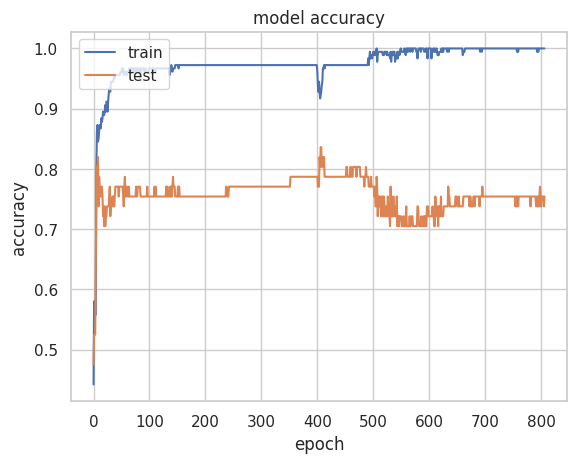

In [206]:
### 12. What does the plot generated by this code represent?

plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

What does the plot generated by this code represent?
- This plot helps visualize the training and validation accuracy of the model over epochs, allowing for the assessment of the model's learning progress and generalization performance. It is useful for monitoring the training process and diagnosing potential issues such as overfitting or underfitting.

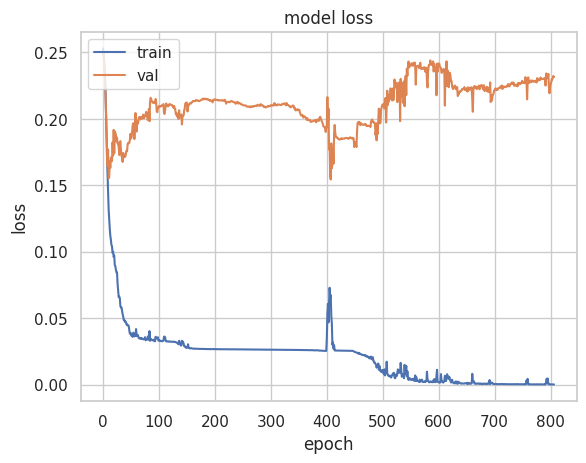

In [207]:
### 13. Plot code for the model loss. You can refer to the plot code for model accuracy above.

# Plotting the loss
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [208]:
### 14. What is the purpose of evaluating the model on the test dataset?

#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

2/2 [==============================] - 0s 7ms/step - loss: 0.1523 - acc: 0.8361

acc: 83.61%
loss: 0.15


What is the purpose of evaluating the model on the test dataset?
- Generalization Assessment: Evaluate how well the model performs on unseen data.
- Overfitting Detection: Detect if the model has overfit to the training data.
- Performance Benchmarking: Compare the model's performance against other models or benchmarks.
- Robustness Validation: Validate the model's ability to handle variations in real-world data.
- Insight Generation: Gain insights into the model's strengths, weaknesses, and areas for improvement.

In [209]:
#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl)

2/2 [==============================] - 0s 6ms/step
No: 1 Actual: [0]  Predicted: [0] Result: Pass
No: 2 Actual: [0]  Predicted: [1]  Result: Fail
No: 3 Actual: [1]  Predicted: [1] Result: Pass
No: 4 Actual: [0]  Predicted: [0] Result: Pass
No: 5 Actual: [1]  Predicted: [1] Result: Pass
No: 6 Actual: [1]  Predicted: [1] Result: Pass
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [0]  Predicted: [0] Result: Pass
No: 9 Actual: [0]  Predicted: [0] Result: Pass
No: 10 Actual: [1]  Predicted: [0]  Result: Fail
No: 11 Actual: [1]  Predicted: [1] Result: Pass
No: 12 Actual: [1]  Predicted: [1] Result: Pass
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [1]  Predicted: [1] Result: Pass
No: 18 Actual: [0]  Predicted: [0] Result: Pass
No: 19 Actual: [0]  Predicted: [0] Result: Pass
No: 20 Actual: [0]  Predicted: [0] Result: P

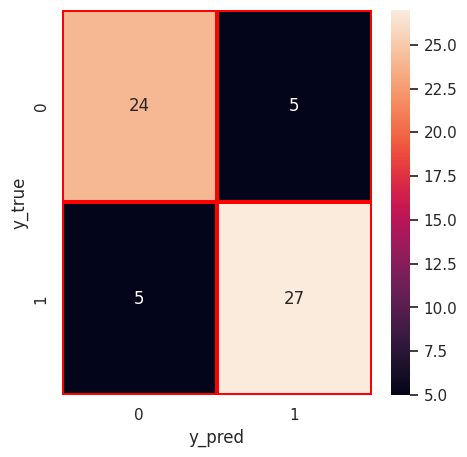


              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [210]:
### 15. What is Confusion Matrix and why you need it? Explain TP, FP, FN, TN.
### 16. Explain the classification report produce.

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

What is Confusion Matrix and why you need it? Explain TP, FP, FN, TN.
- A Confusion Matrix is a performance measurement tool used in classification tasks to evaluate the performance of a machine learning model. It provides a tabular representation of the predicted outcomes versus the actual outcomes for a classification problem.
  - True Positive (TP): The cases where the model predicted the positive class correctly, and the actual class was also positive.
  - False Positive (FP): The cases where the model predicted the positive class incorrectly, but the actual class was negative.
  - False Negative (FN):The cases where the model predicted the negative class incorrectly, but the actual class was positive.
  - True Negative (TN):The cases where the model predicted the negative class correctly, and the actual class was also negative.
- Confusion matrix is needed for *Performance Evaluation*, *Error Analysis*, *Model Selection*, *Threshold Selection* and *Actionable Insights*.

Explain the classification report produce.
- Precision: Precision measures the proportion of true positive predictions among all positive predictions made by the model.
  - For class 0: The precision is 0.83, meaning that out of all the instances predicted as class 0, 83% were correctly classified.
  - For class 1: The precision is 0.84, indicating that out of all the instances predicted as class 1, 84% were correctly classified.
- Recall (Sensitivity): Recall measures the proportion of true positive predictions among all actual positive instances in the dataset.
  - For class 0: The recall is 0.83, meaning that the model correctly identified 83% of all instances that actually belong to class 0.
  - For class 1: The recall is 0.84, indicating that the model correctly identified 84% of all instances that actually belong to class 1.
- F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall, giving equal weight to both metrics.
  - For class 0: The F1-score is 0.83.
  - For class 1: The F1-score is 0.84.
- Support: Support refers to the number of actual instances of each class in the dataset.
  - For class 0: There are 29 instances of class 0 in the dataset.
  - For class 1: There are 32 instances of class 1 in the dataset.
- Accuracy: Accuracy measures the proportion of correctly classified instances out of all instances in the dataset.
  - The overall accuracy of the model is 0.84, indicating that 84% of the instances in the dataset were correctly classified by the model.
- Macro Average:The macro average calculates the average precision, recall, and F1-score across all classes, without considering class imbalance.
  - The macro average precision, recall, and F1-score are all 0.84.
- Weighted Average: The weighted average calculates the average precision, recall, and F1-score across all classes, taking into account class imbalance.
  - The weighted average precision, recall, and F1-score are all 0.84.